In [3]:
#Import Libraries

import os
from itertools import chain
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
#pip install spacy==2.2.3
#python -m spacy download en_core_web_sm
#pip install beautifulsoup4==4.9.1
#pip install textblob==0.15.3
#from dataclasses import dataclass
#import spacy.cli
#import spacy
#spacy.cli.download("en_core_web_sm",'--no-deps')

#download("en_core_web_sm")


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
path = r"/content/tweets_ws22_v1.json"

with open(path) as f:
   
      dump = json.loads(f.read())
      org_df = pd.json_normalize(dump)
      org_df
    
final_df = pd.DataFrame() 

for i in range(0,len(dump)):
    temp_topic_df = pd.json_normalize(dump[i]['labels']['topic'])
    temp_sentiment_df = pd.json_normalize(dump[i]['labels']['sentiment'])
    temp_topic_df.rename(columns={'id':'topic_id','tweet_id':'topic_tweet_id','user_id':'topic_user_id','ground_truth':'topic_ground_truth'}, inplace = True)
    temp_sentiment_df.rename(columns={'id':'sentiment_id','tweet_id':'sentiment_tweet_id','user_id':'sentiment_user_id','ground_truth':'sentiment_ground_truth'}, inplace = True)
    df_join_topic_sent = temp_topic_df.join(temp_sentiment_df)
    final_df = final_df.append(df_join_topic_sent)
    #final_df = pd.concat([org_df,Joined_df],axis = 1)
    
    
cols = final_df.columns
org_df[cols] = final_df[cols].values


data =  org_df.drop(columns=['labels.topic','labels.sentiment','topic_tweet_id','sentiment_tweet_id','author_id','source','topic_user_id','topic_ground_truth','language','id','source_id','relevant','sentiment_ground_truth','sentiment_id','topic_id','sentiment_user_id'])
data


,source_created_at,text,longitude,latitude,topic,sentiment
0,2020-09-18 21:56:20.798000,@DSisourath The Thameslink core between London...,-0.12574,51.50853,service,negative
1,2020-10-13 07:31:53.122000,@DulwichHistory Loving the complaint about peo...,-0.12574,51.50853,delays,negative
2,2020-10-26 19:27:24.695000,@SW_Help .And yet you have no toilets on some ...,-0.12574,51.50853,toilets,negative
3,2020-10-26 19:28:49.281000,@SW_Help you have no toilets on some of your t...,-0.12574,51.50853,toilets,negative
4,2020-09-28 11:59:41.212000,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,-1.09125,50.79899,seats,neutral
...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,Haha oh man the audio corruption on @TLRailUK ...,NaN,NaN,announcements,neutral
16945,2020-08-10 11:19:10.181000,@TLRailUK SweetIs there a plug to charge my ph...,-0.12574,51.50853,plugs,neutral
16946,2020-08-29 09:51:10.833000,@TLRailUK now there are far fewer commuters ha...,-0.12574,51.50853,tables,neutral
16947,2020-11-02 12:06:06.967000,@geofftech I am voting for Thameslink. 1. in a...,-0.12574,51.50853,toilets,neutral


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source_created_at  16949 non-null  object 
 1   text               16949 non-null  object 
 2   longitude          1425 non-null   float64
 3   latitude           1425 non-null   float64
 4   topic              16949 non-null  object 
 5   sentiment          16949 non-null  object 
dtypes: float64(2), object(4)
memory usage: 794.6+ KB


In [77]:
pip install text-hammer==0.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import text_hammer as th

In [80]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))

    return(df)

In [81]:
cleaned_df = text_preprocessing(data,'text')
cleaned_df.head()

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

,source_created_at,text,longitude,latitude,topic,sentiment
0,2020-09-18 21:56:20.798000,dsisourath the thameslink core between london ...,-0.12574,51.50853,service,negative
1,2020-10-13 07:31:53.122000,dulwichhistory loving the complaint about peop...,-0.12574,51.50853,delays,negative
2,2020-10-26 19:27:24.695000,sw_help and yet you have no toilets on some of...,-0.12574,51.50853,toilets,negative
3,2020-10-26 19:28:49.281000,sw_help you have no toilets on some of your tr...,-0.12574,51.50853,toilets,negative
4,2020-09-28 11:59:41.212000,speedysticks007 mrneiljh tlrailuk christianwol...,-1.09125,50.79899,seats,neutral


In [10]:
#Preparing data for Bert Architecture format

In [82]:
cleaned_df['num_words'] = cleaned_df.text.apply(lambda x:len(x.split()))
cleaned_df.num_words.max()

87

In [83]:
# changing the data type to the category to encode into codes 
cleaned_df['sentiment'] = cleaned_df.sentiment.astype('category')
cleaned_df.sentiment

0        negative
1        negative
2        negative
3        negative
4         neutral
           ...   
16944     neutral
16945     neutral
16946     neutral
16947     neutral
16948     neutral
Name: sentiment, Length: 16949, dtype: category
Categories (3, object): ['negative', 'neutral', 'positive']

In [84]:
cleaned_df['sentiment']  =  cleaned_df.sentiment.cat.codes
cleaned_df.sentiment

0        0
1        0
2        0
3        0
4        1
        ..
16944    1
16945    1
16946    1
16947    1
16948    1
Name: sentiment, Length: 16949, dtype: int8

In [85]:
cleaned_df.head()

,source_created_at,text,longitude,latitude,topic,sentiment,num_words
0,2020-09-18 21:56:20.798000,dsisourath the thameslink core between london ...,-0.12574,51.50853,service,0,21
1,2020-10-13 07:31:53.122000,dulwichhistory loving the complaint about peop...,-0.12574,51.50853,delays,0,19
2,2020-10-26 19:27:24.695000,sw_help and yet you have no toilets on some of...,-0.12574,51.50853,toilets,0,27
3,2020-10-26 19:28:49.281000,sw_help you have no toilets on some of your tr...,-0.12574,51.50853,toilets,0,29
4,2020-09-28 11:59:41.212000,speedysticks007 mrneiljh tlrailuk christianwol...,-1.09125,50.79899,seats,1,37


In [86]:
from tensorflow.keras.utils import to_categorical
to_categorical(cleaned_df.sentiment,3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [125]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(cleaned_df, test_size = 0.3, random_state = 42, stratify = cleaned_df.sentiment)

In [126]:
data_train.shape


(11864, 7)

In [127]:
data_test.shape

(5085, 7)

In [128]:
data_train['sentiment'].value_counts()

0    7440
1    4255
2     169
Name: sentiment, dtype: int64

In [129]:
data_test['sentiment'].value_counts()

0    3188
1    1824
2      73
Name: sentiment, dtype: int64

In [130]:
data_train['sentiment']=data_train['sentiment'].replace(2,1) 

In [131]:
data_test['sentiment']=data_test['sentiment'].replace(2,1)

In [132]:
data_train['sentiment'].value_counts()

0    7440
1    4424
Name: sentiment, dtype: int64

In [133]:
data_test['sentiment'].value_counts()

0    3188
1    1897
Name: sentiment, dtype: int64

In [134]:
from tensorflow.keras.utils import to_categorical
to_categorical(data_train.sentiment,2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [135]:
from tensorflow.keras.utils import to_categorical
to_categorical(data_test.sentiment,2)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
!pip install transformers
from transformers import AutoTokenizer,TFDistilBertModel
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-cased')
dbert = TFDistilBertModel.from_pretrained('distilbert-base-cased')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 6.6 MB/s 
     |████████████████████████████████| 7.6 MB 42.7 MB/s 
     |████████████████████████████████| 182 kB 19.6 MB/s 


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/354M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [136]:
tokenizer.save_pretrained('bert-tokenizer')
dbert.save_pretrained('dbert-model')

In [137]:
import shutil
shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')

'/content/bert-tokenizer.zip'

In [138]:
shutil.make_archive('dbert-model','zip','dbert-model')

'/content/dbert-model.zip'

In [140]:
# Tokenize the input  

x_train = tokenizer(
    text=data_train.text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


x_test = tokenizer(
    text=data_test.text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [141]:
from sklearn.utils import class_weight
#Calculate weights 
weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(data_train['sentiment']),y = data_train['sentiment'])
weights

#transform array to dictionary
weights = dict(enumerate(weights))

cleaned_df['sentiment']  =  cleaned_df.sentiment.cat.codes
cleaned_df.sentiment

# Model

In [142]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [143]:
#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [31]:
#tf.config.experimental.list_physical_devices('GPU')

In [144]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds

In [145]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [146]:
max_len = 70
   
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
    


embeddings = dbert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(2,activation = 'softmax')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

#return model, tokenizer


In [147]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  65190912   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 70, 768),                                                    
                                 hidden_states=None                                         

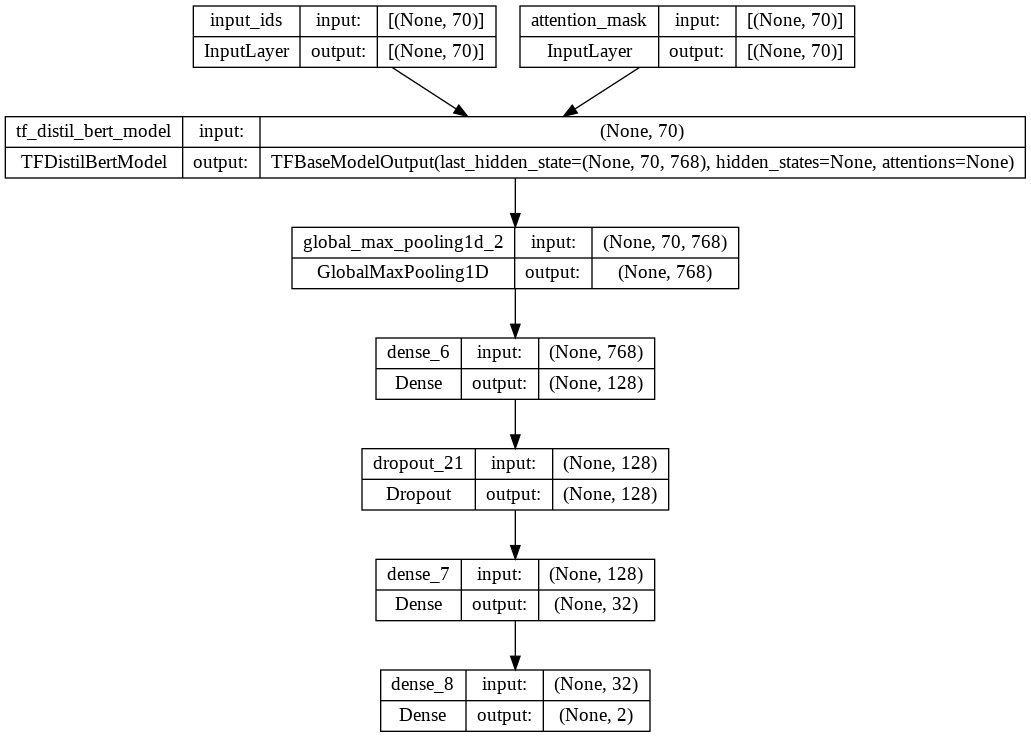

In [148]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [149]:
optimizer = Adam(learning_rate = 5e-05, epsilon=1e-08, decay =0.01,clipnorm= 1.0)

loss = CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),

#compile model
model.compile(optimizer =optimizer,loss = loss,metrics =metric)

In [150]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

In [151]:
#Model fit and evaluation

In [152]:
train = model.fit(x= {'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']},
                  y=to_categorical(data_train.sentiment,2),
                  validation_data= ({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']},to_categorical(data_test.sentiment,2)),
                  epochs =1,
                  batch_size =100,
                 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


119/119 [==============================] - 1273s 11s/step - loss: 0.5419 - balanced_accuracy: 0.7173 - val_loss: 0.5247 - val_balanced_accuracy: 0.7310


In [153]:
model.save_weights('sentiment_weights.h5')

In [154]:
model.load_weights('sentiment_weights.h5')

In [155]:
#Model prediction without balancing(Neutral + Positive)

In [156]:
predict = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

159/159 [==============================] - 433s 3s/step


In [157]:
y_predicted = np.argmax(predict,axis =1)

In [158]:
data_test.sentiment #ytrue

6271     0
8226     0
15499    1
8973     0
5871     0
        ..
4769     0
2126     1
8877     0
11428    1
12162    1
Name: sentiment, Length: 5085, dtype: int8

In [159]:
from sklearn.metrics import classification_report
print(classification_report(data_test.sentiment,y_predicted ))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      3188
           1       0.67      0.54      0.60      1897

    accuracy                           0.73      5085
   macro avg       0.71      0.69      0.70      5085
weighted avg       0.72      0.73      0.72      5085



In [160]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
#from sklearn.metrics import scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print(f'Confusion matrix  \n {confusion_matrix(data_test.sentiment,y_predicted)}' )
    #print(f'ROC AUC  : {roc_auc_score(data_test.sentiment,y_predicted)}' )
    #tn, fp, fn, tp = confusion_matrix(data_test.sentiment,y_predicted).ravel()
    #print('sensitivity is %f',1.*tp/(tp+fn))
    #print('specificity is %f',1.*tn/(tn+fp))
    #print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    #print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
    #print('Type1 Error is %f',1.*(fp))
    #print('Type2 Error is %f',1.*(fn))

Confusion matrix  
 [[2690  498]
 [ 870 1027]]


In [161]:
# testing the model

In [162]:
input_text = input(str('input the text'))

x_val = tokenizer(
        text=input_text,
        add_special_tokens=True,
        max_length=70,truncation=True,
        padding='max_length', 
        return_tensors='tf',
        return_token_type_ids = False,
        return_attention_mask = True,verbose = True)
validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100 
validation

input the textwashroom is not working fine


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 2s 2s/step


array([[62.40566 , 37.594337]], dtype=float32)

In [166]:
encoded_dict  = {'negative':0,'positive':1}

In [167]:
for key,value in zip(encoded_dict.keys(),validation[0]):
    print(key,value)

negative 62.40566
neutral 37.594337


In [170]:
x=validation[0][0]
y=validation[0][1]

if x > y :
  #if x > z:
    print(input_text),
    with open('/content/sample_data/Text.txt', 'w') as f:
     f.write(input_text) 
   # print(x);
else :
    with open('/content/sample_data/Text.txt', 'w') as f:
     f.write("")

washroom is not working fine


In [171]:
#  after balancing using class weight

In [172]:
train = model.fit (x= {'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']},
                  y=to_categorical(data_train.sentiment,2),
                  validation_data= ({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']},to_categorical(data_test.sentiment,2)),
                  epochs =1,
                  batch_size = 150,
                  class_weight = weights,
                 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


80/80 [==============================] - 1057s 13s/step - loss: 0.4859 - balanced_accuracy: 0.7562 - val_loss: 0.6213 - val_balanced_accuracy: 0.6602


In [173]:
model.save_weights('sentiment_weights2.h5')

In [174]:
model.load_weights('sentiment_weights2.h5')

In [175]:
predicted = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

159/159 [==============================] - 435s 3s/step


In [176]:
y_predicted = np.argmax(predicted,axis =1)

In [177]:
from sklearn.metrics import classification_report
print(classification_report(data_test.sentiment,y_predicted ))

              precision    recall  f1-score   support

           0       0.89      0.52      0.66      3188
           1       0.53      0.89      0.66      1897

    accuracy                           0.66      5085
   macro avg       0.71      0.71      0.66      5085
weighted avg       0.75      0.66      0.66      5085



In [178]:
print(f'Confusion matrix  \n {confusion_matrix(data_test.sentiment,y_predicted)}' )
    

Confusion matrix  
 [[1668 1520]
 [ 208 1689]]


In [179]:
input_text = input(str('input the text'))

x_val = tokenizer(
        text=input_text,
        add_special_tokens=True,
        max_length=70,truncation=True,
        padding='max_length', 
        return_tensors='tf',
        return_token_type_ids = False,
        return_attention_mask = True,verbose = True)
validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100 
validation

input the texttrain got late by 3hrs


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 2s 2s/step


array([[80.69582 , 19.304173]], dtype=float32)

In [180]:
for key,value in zip(encoded_dict.keys(),validation[0]):
    print(key,value)

negative 80.69582
neutral 19.304173


In [182]:
x=validation[0][0]
y=validation[0][1]
#z=validation[0][2]
if x > y :
  #if x > z:
    print(input_text),
    with open('/content/sample_data/Text_cw.txt', 'w') as f:
     f.write(input_text) 
   # print(x);
else :
    with open('/content/sample_data/Text_cw.txt', 'w') as f:
     f.write("")

train got late by 3hrs
